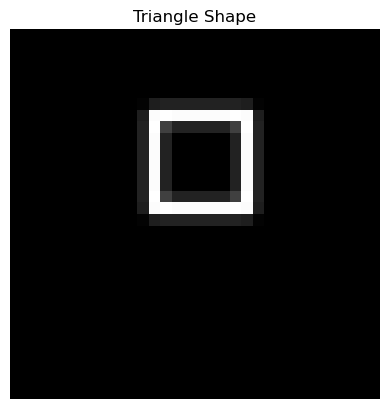

In [94]:
import numpy as np
import random
from math import sqrt, cos, sin, radians
from skimage.draw import circle_perimeter, rectangle_perimeter, polygon_perimeter


def generate_shape_sample(shape, loops, image_size=(32, 32), blur_sigma=0.5):
    # Create a blank image
    image = np.zeros(image_size, dtype=np.float32)
    
    for _ in range(loops):
        # Define the shape size and location randomly
        size = random.randint(5, max(image_size)//4)    # 5 ~ 8
        x, y = random.randint(size, image_size[0]-size-1), random.randint(size, image_size[1]-size-1)
        # 32 - 5 - 1  = 26 ~ 32 - 8 - 1 = 23
        if shape == 'circle':
            rr, cc = circle_perimeter(x, y, size)
            image[rr, cc] = 1.0  # Set the circle border to white
        elif shape == 'rectangle':
            start_x = max(1, x)
            start_y = max(1, y)
            end_x = min(image_size[0] -size, x + size)
            end_y = min(image_size[1] -size, y + size)
            rr, cc = rectangle_perimeter((start_x, start_y), end=(end_x, end_y))
            image[rr, cc] = 1.0 # Set the rectangle border to white
        elif shape == 'triangle':
            # Calculate triangle vertices
            h = sqrt(3) / 2 * size
            angles = [0, 120, 240]

            vertices = np.array([(
                x - cos(radians(angle)) * h, 
                y + sin(radians(angle)) * h) for angle in angles]
                )
            # Manually drawing the triangle by lines
            rr, cc = polygon_perimeter(vertices[:, 0], vertices[:, 1], shape=image_size)
            image[rr, cc] = 1.0  # Set the triangle border to white

    # Apply Gaussian blur to the image
    image_blurred = gaussian_filter(image, sigma=blur_sigma)

    return image_blurred

# Testing triangle shape generation
image_array_triangle = generate_shape_sample('rectangle', 1)
plt.imshow(image_array_triangle, cmap='gray')
plt.title('Triangle Shape')
plt.axis('off')
plt.show()


In [77]:
os.listdir()

['__init__.py',
 'example_dataset',
 'base.py',
 'generate_example_dataset.ipynb',
 'datasets.py',
 'dataloader.py']

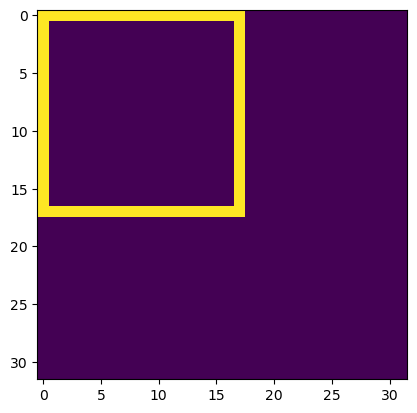

In [78]:
img = np.zeros((32,32))

rr, cc = rectangle_perimeter((1,1), (16,16))
img[rr,cc] = 1.0
plt.imshow(img)

In [95]:
import os
import pandas as pd
import numpy as np
import random

# Seed 값 설정
random_seed = 42
random.seed(random_seed)  # random 모듈에 대한 seed 설정
np.random.seed(random_seed)  # numpy에 대한 seed 설정

# Directory for saving the numpy files
save_dir = "example_dataset/images/train"
#if not os.path.exists(save_dir):
#    os.makedirs(save_dir)

# Initialize metadata list
metadata = []

# Shape types to generate
shapes = ['circle', 'rectangle', 'triangle']
# Loop counts to generate for each shape
loop_counts = [1, 2, 3, 4]

# File counter
file_counter = 0

for shape in shapes:
    for loop in loop_counts:
        for _ in range(20):  # Generate 20 samples per loop count
            # Generate the sample
            image = generate_shape_sample(shape, loop)
            # Define the file name
            file_name = f"train_{file_counter:03d}.npy"
            # Save the numpy array to a file
            np.save(os.path.join(save_dir, file_name), image)
            # Append metadata
            metadata.append([file_name, shape, loop])
            # Increment the file counter
            file_counter += 1



OSError: Cannot save file into a non-existent directory: 'data/example_dataset/metadata'

In [98]:
# Convert metadata list to a DataFrame
metadata_df = pd.DataFrame(metadata, columns=['File Name', 'Shape', 'Loop Count'])

# Save metadata to a CSV file
metadata_csv_path = os.path.join("example_dataset/metadata", "metadata.csv")
metadata_df.to_csv(metadata_csv_path, index=False)

metadata_csv_path


'example_dataset/metadata/metadata.csv'

In [99]:
pd.read_csv('example_dataset/metadata/metadata.csv')

,File Name,Shape,Loop Count
0,train_000.npy,circle,1
1,train_001.npy,circle,1
2,train_002.npy,circle,1
3,train_003.npy,circle,1
4,train_004.npy,circle,1
...,...,...,...
235,train_235.npy,triangle,4
236,train_236.npy,triangle,4
237,train_237.npy,triangle,4
238,train_238.npy,triangle,4


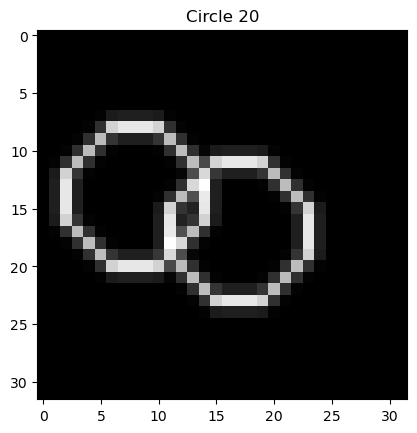

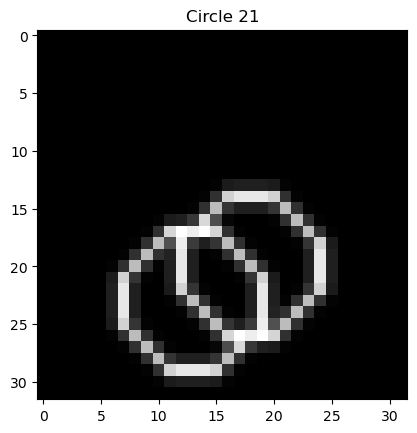

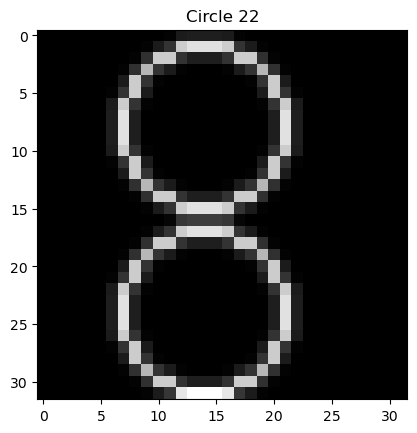

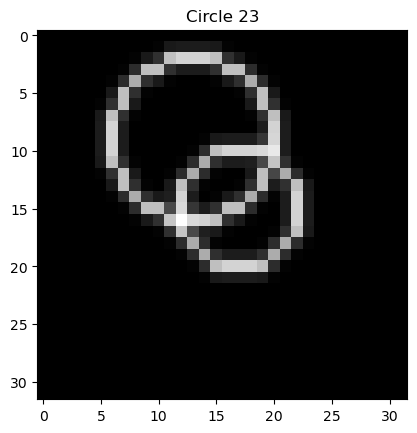

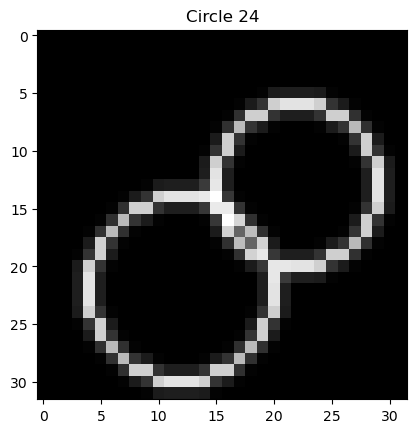

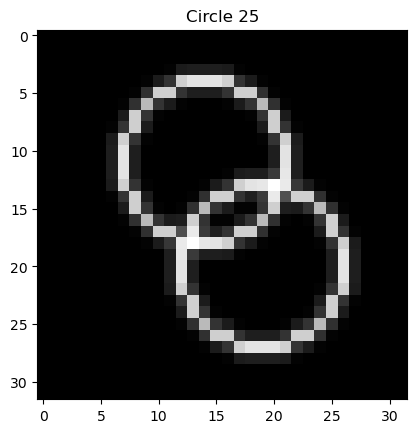

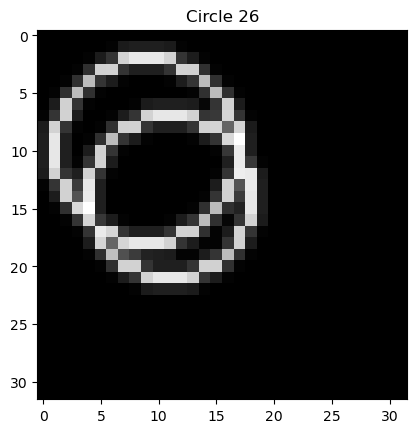

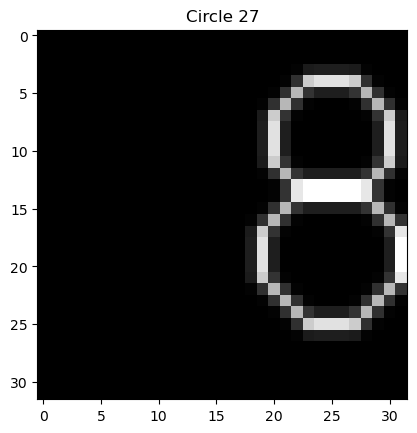

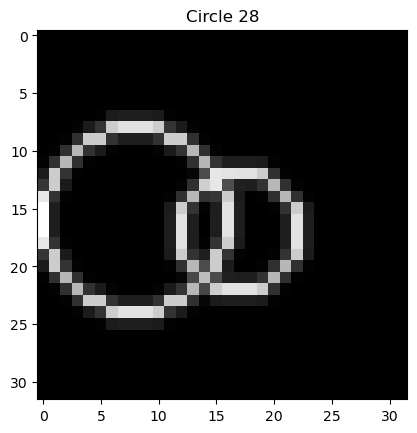

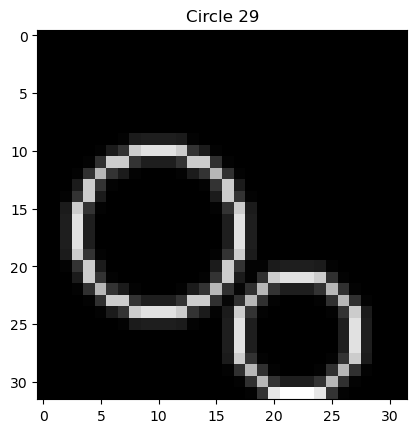

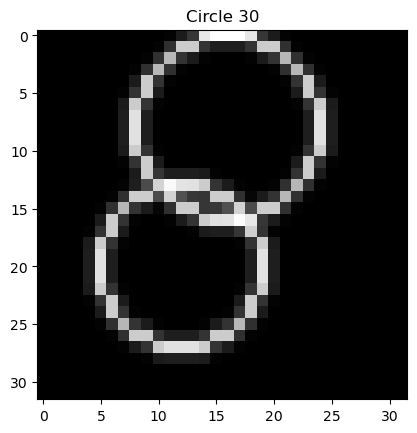

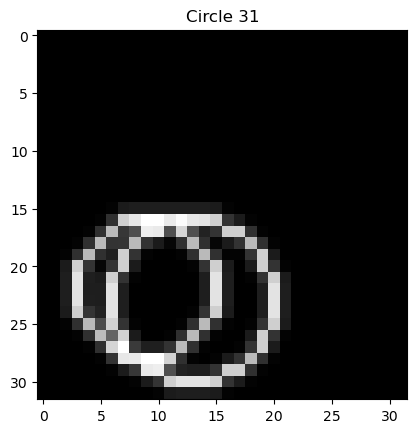

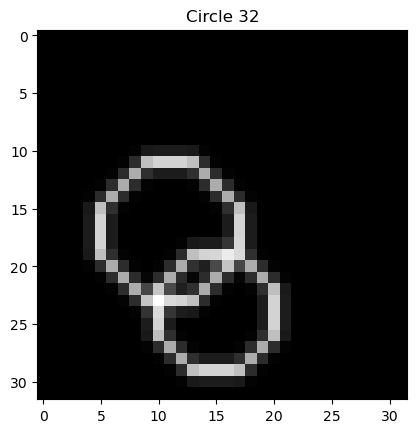

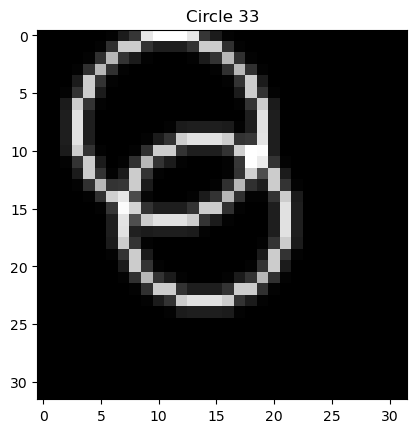

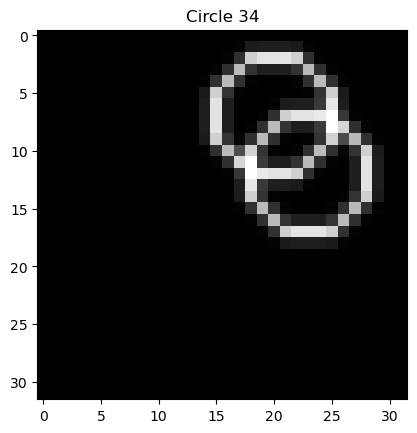

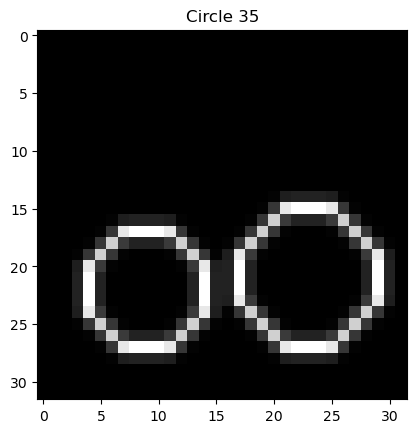

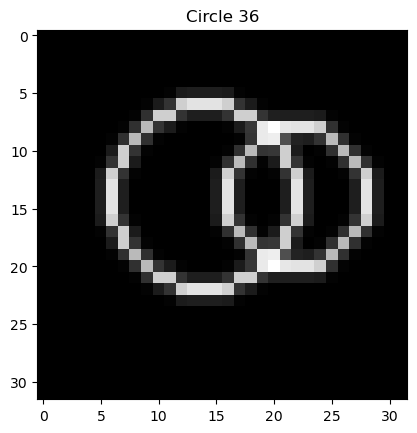

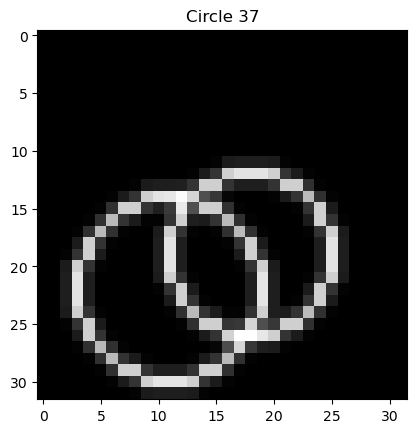

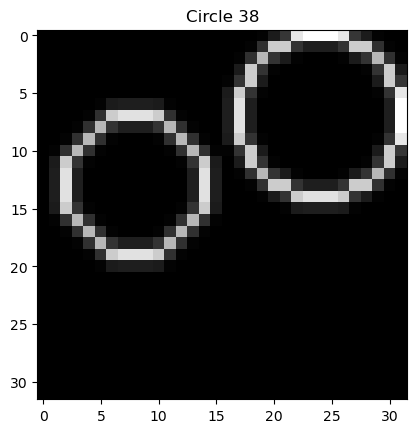

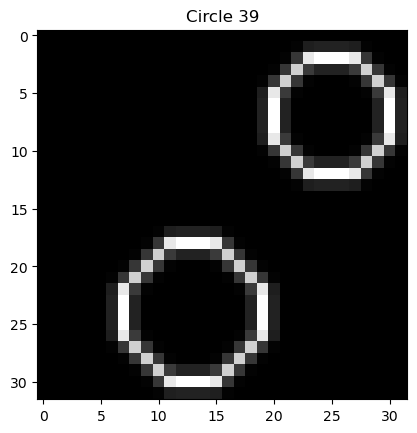

In [108]:
def load_sample(id):
    dir_path = 'example_dataset/images/train/'
    file_name = f"train_{id:03d}.npy"
    file_path = os.path.join(dir_path, file_name)
    return np.load(file_path)

for n in range(20,40):
    plt.imshow(load_sample(n), cmap='gray')
    plt.title(f'Circle {n}')
    plt.show()

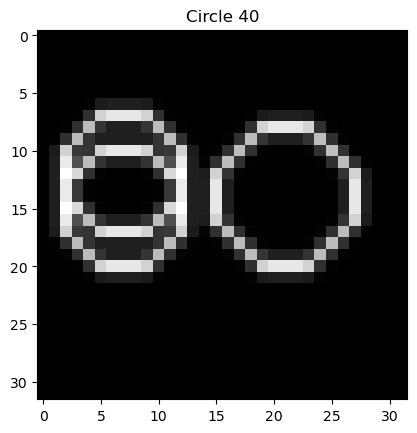

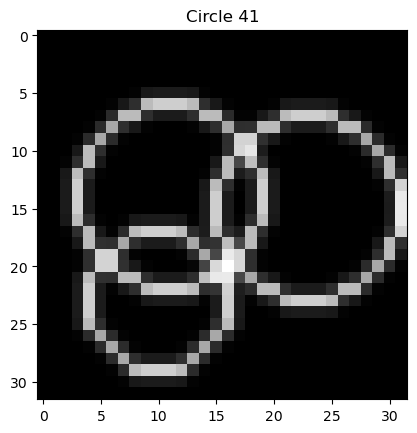

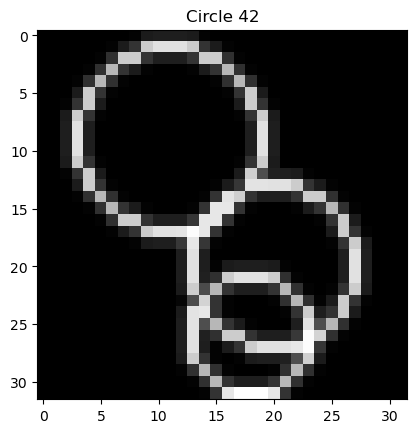

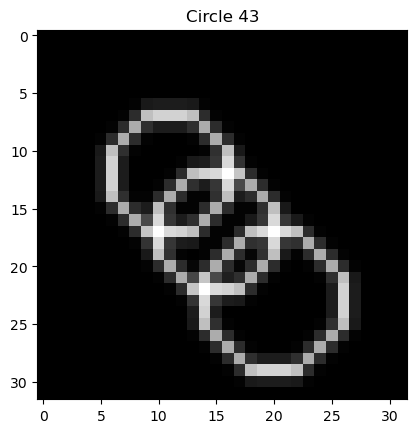

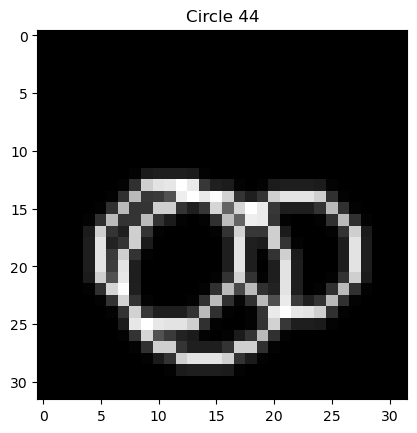

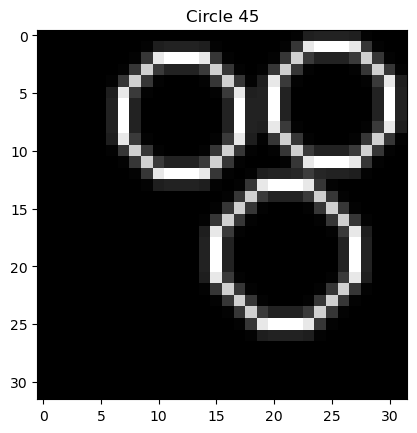

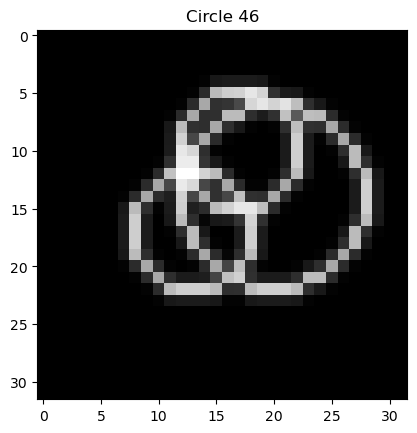

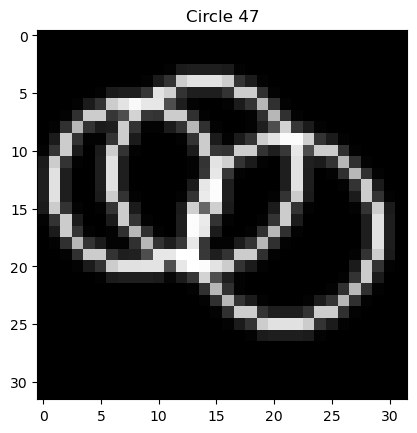

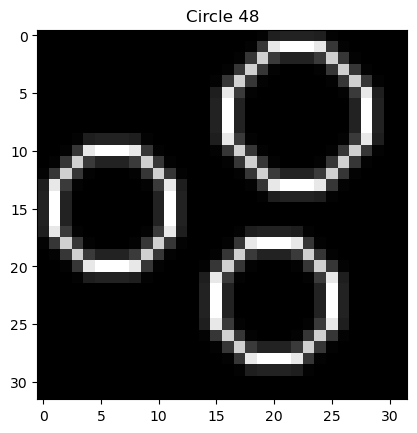

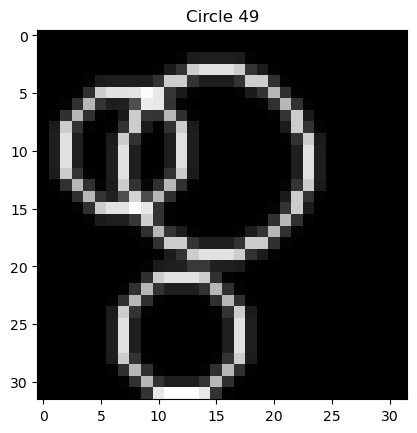

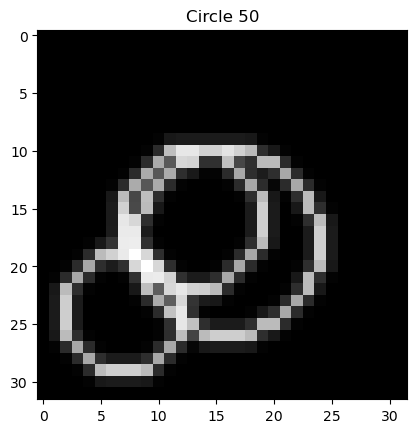

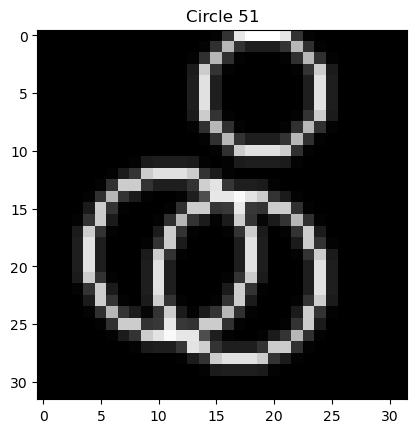

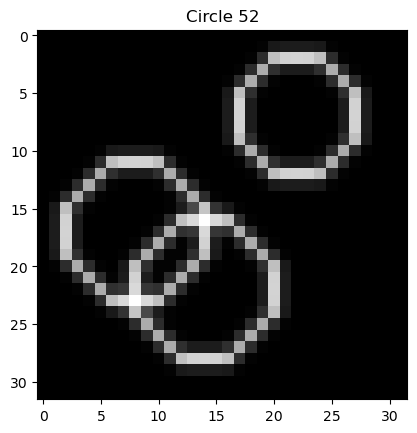

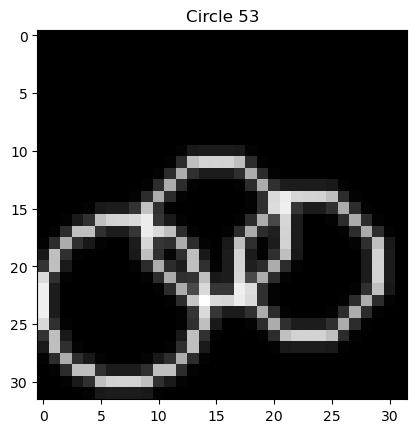

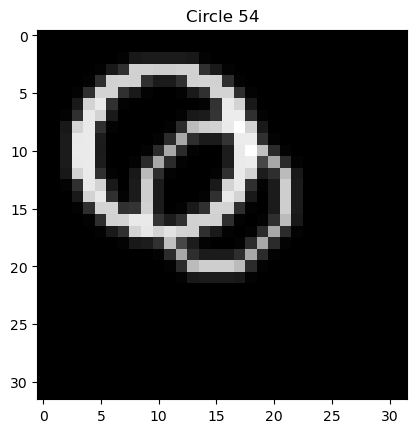

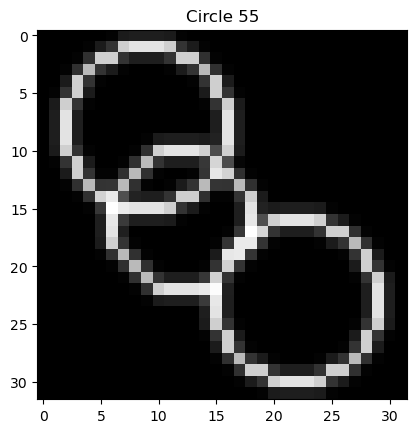

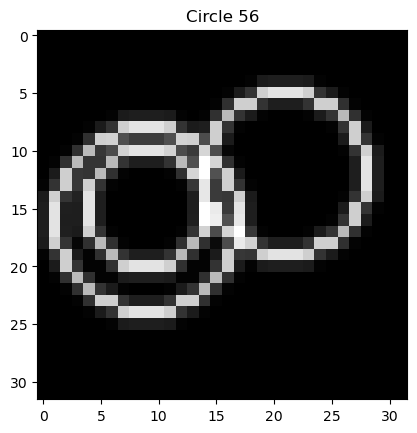

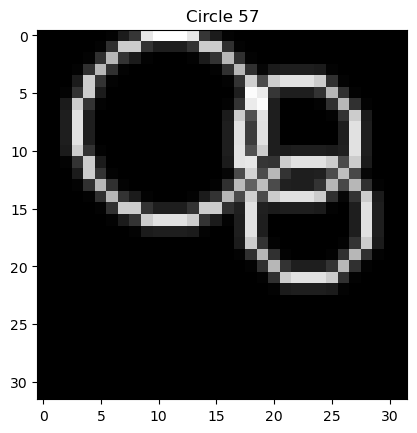

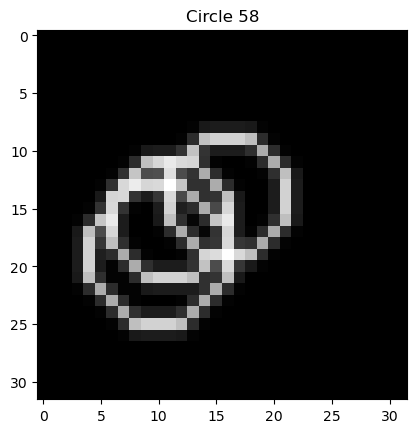

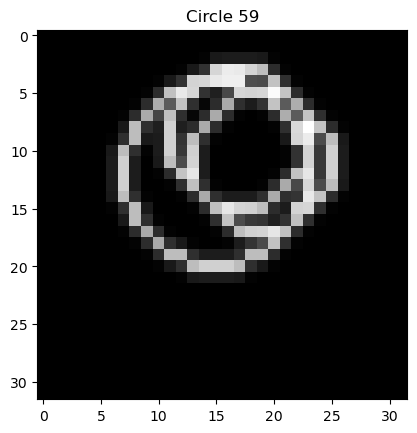

In [109]:
for n in range(40,60):
    plt.imshow(load_sample(n), cmap='gray')
    plt.title(f'Circle {n}')
    plt.show()